In [1]:
import pandas as pd

In [2]:
df = pd.read_excel("Data/Raw/Rockburst_in_tunnel.xlsx",header=None)

In [3]:
df.head()

,0
0,1 41 5.968 4.694 3.727 4.926 3.653 11 Intense
1,2 14 5.841 4.622 1.556 4.887 3.668 9 Moderate
2,3 17 4.754 4.397 1.889 3.8 3.443 9 Moderate
3,4 18 5.295 4.703 1.8 4.295 3.703 10 Moderate
4,5 10 5.322 4.238 1.429 4.477 3.393 7 Moderate


In [4]:
# spliting into columns
df=df[0].str.split(expand=True)

In [5]:
df.head()

,0,1,2,3,4,5,6,7,8
0,1,41,5.968,4.694,3.727,4.926,3.653,11,Intense
1,2,14,5.841,4.622,1.556,4.887,3.668,9,Moderate
2,3,17,4.754,4.397,1.889,3.8,3.443,9,Moderate
3,4,18,5.295,4.703,1.8,4.295,3.703,10,Moderate
4,5,10,5.322,4.238,1.429,4.477,3.393,7,Moderate


In [6]:
df.drop(0,axis=1,inplace=True)

In [7]:
# Giving columns an appropriate names
df.columns = [
    "Energy_Unit",
    "Energy_density_Joule",
    "Volume_m3",
    "Event_freq_unit_per_day",
    "Energy_Joule_per_day",
    "Volume_m3_per_day",
    "Duration_days",
    "Intensity_Level"
]


In [8]:
df.head()

,Energy_Unit,Energy_density_Joule,Volume_m3,Event_freq_unit_per_day,Energy_Joule_per_day,Volume_m3_per_day,Duration_days,Intensity_Level
0,41,5.968,4.694,3.727,4.926,3.653,11,Intense
1,14,5.841,4.622,1.556,4.887,3.668,9,Moderate
2,17,4.754,4.397,1.889,3.8,3.443,9,Moderate
3,18,5.295,4.703,1.8,4.295,3.703,10,Moderate
4,10,5.322,4.238,1.429,4.477,3.393,7,Moderate


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Energy_Unit              91 non-null     object
 1   Energy_density_Joule     91 non-null     object
 2   Volume_m3                91 non-null     object
 3   Event_freq_unit_per_day  91 non-null     object
 4   Energy_Joule_per_day     91 non-null     object
 5   Volume_m3_per_day        91 non-null     object
 6   Duration_days            91 non-null     object
 7   Intensity_Level          91 non-null     object
dtypes: object(8)
memory usage: 5.8+ KB


In [10]:
# Convert all feature columns to numeric type safely
df["Energy_Unit"] = pd.to_numeric(df["Energy_Unit"], errors='coerce')
df["Energy_density_Joule"] = pd.to_numeric(df["Energy_density_Joule"], errors='coerce')
df["Volume_m3"] = pd.to_numeric(df["Volume_m3"], errors='coerce')
df["Event_freq_unit_per_day"] = pd.to_numeric(df["Event_freq_unit_per_day"], errors='coerce')
df["Energy_Joule_per_day"] = pd.to_numeric(df["Energy_Joule_per_day"], errors='coerce')
df["Volume_m3_per_day"] = pd.to_numeric(df["Volume_m3_per_day"], errors='coerce')
df["Duration_days"] = pd.to_numeric(df["Duration_days"], errors='coerce')


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Energy_Unit              91 non-null     int64  
 1   Energy_density_Joule     91 non-null     float64
 2   Volume_m3                91 non-null     float64
 3   Event_freq_unit_per_day  91 non-null     float64
 4   Energy_Joule_per_day     91 non-null     float64
 5   Volume_m3_per_day        91 non-null     float64
 6   Duration_days            91 non-null     int64  
 7   Intensity_Level          91 non-null     object 
dtypes: float64(5), int64(2), object(1)
memory usage: 5.8+ KB


In [12]:
df.isnull().sum()

Energy_Unit                0
Energy_density_Joule       0
Volume_m3                  0
Event_freq_unit_per_day    0
Energy_Joule_per_day       0
Volume_m3_per_day          0
Duration_days              0
Intensity_Level            0
dtype: int64

In [13]:
df["Intensity_Level"].unique()

array(['Intense', 'Moderate', 'Slight', 'None'], dtype=object)

In [14]:
df["Intensity_Level"] = df["Intensity_Level"].replace({"None": "Stable"})

In [15]:
from sklearn.preprocessing import LabelEncoder

Intensity_level_mapping={"Stable":0,"Slight":1,"Moderate":2,"Intense":3}
df["Intensity_Level_encoded"]=df["Intensity_Level"].map(Intensity_level_mapping)


In [16]:
df["Intensity_Level"].unique()

array(['Intense', 'Moderate', 'Slight', 'Stable'], dtype=object)

In [17]:
df.describe()

,Energy_Unit,Energy_density_Joule,Volume_m3,Event_freq_unit_per_day,Energy_Joule_per_day,Volume_m3_per_day,Duration_days,Intensity_Level_encoded
count,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000
mean,12.340659,4.363945,4.132923,1.662473,3.539187,3.318835,7.769231,1.142857
std,13.133688,1.450148,0.659514,1.689152,1.338949,0.588594,4.422360,1.060099
min,1.000000,0.780000,2.511000,0.111000,0.178000,1.666000,1.000000,0.000000
25%,3.500000,3.781000,3.718000,0.725000,2.870500,2.956500,4.000000,0.000000
50%,8.000000,4.614000,4.238000,1.222000,3.739000,3.474000,7.000000,1.000000
75%,17.000000,5.311000,4.643500,2.000000,4.575000,3.724500,10.000000,2.000000
max,70.000000,7.094000,5.168000,12.250000,5.890000,4.393000,23.000000,3.000000


# Feature Enginerring

In [18]:
# Energy per Volume  (Formula: Energy_Unit / Volume_m3)
df["Energy_per_Volume"]=df["Energy_Unit"]/df["Volume_m3"]

In [19]:
# Energy per Duration (Formula: Energy_Unit / Duration_days)
df["Energy_per_Duration"]=df["Energy_Unit"]/df["Duration_days"]

In [20]:
# Volume Change Rate (Formula: Volume_m3_per_day / Duration_days)
df["Volume_Change_Rate"]=df["Volume_m3_per_day"]/df["Duration_days"]

In [21]:
# # Saving the df 
# df.to_csv('Data/PreProcessed/Rockburst_in_tunnel.csv', index=False)

In [23]:
df.head()

,Energy_Unit,Energy_density_Joule,Volume_m3,Event_freq_unit_per_day,Energy_Joule_per_day,Volume_m3_per_day,Duration_days,Intensity_Level,Intensity_Level_encoded,Energy_per_Volume,Energy_per_Duration,Volume_Change_Rate
0,41,5.968,4.694,3.727,4.926,3.653,11,Intense,3,8.734555,3.727273,0.332091
1,14,5.841,4.622,1.556,4.887,3.668,9,Moderate,2,3.028992,1.555556,0.407556
2,17,4.754,4.397,1.889,3.800,3.443,9,Moderate,2,3.866272,1.888889,0.382556
3,18,5.295,4.703,1.800,4.295,3.703,10,Moderate,2,3.827344,1.800000,0.370300
4,10,5.322,4.238,1.429,4.477,3.393,7,Moderate,2,2.359604,1.428571,0.484714



Logistic Regression Performance:
Accuracy: 0.631578947368421
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86         7
           1       0.33      0.40      0.36         5
           2       0.60      0.60      0.60         5
           3       1.00      0.50      0.67         2

    accuracy                           0.63        19
   macro avg       0.70      0.59      0.62        19
weighted avg       0.67      0.63      0.64        19



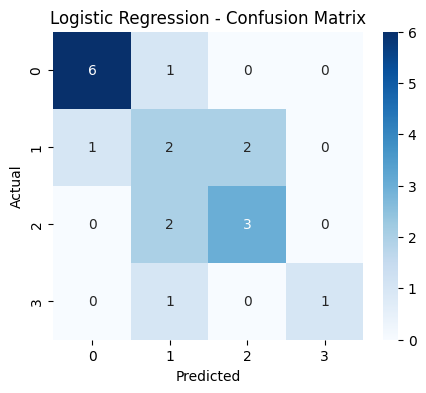


Random Forest Performance:
Accuracy: 0.47368421052631576
Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.71      0.62         7
           1       0.25      0.20      0.22         5
           2       0.40      0.40      0.40         5
           3       1.00      0.50      0.67         2

    accuracy                           0.47        19
   macro avg       0.55      0.45      0.48        19
weighted avg       0.48      0.47      0.46        19



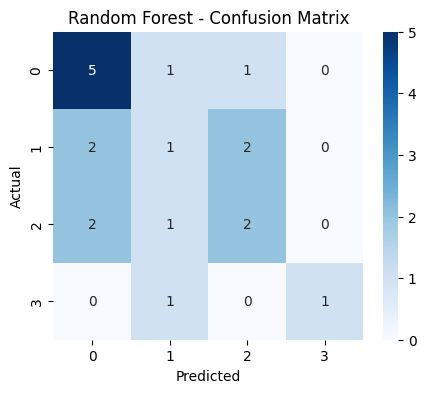


SVM Performance:
Accuracy: 0.6842105263157895
Classification Report:
               precision    recall  f1-score   support

           0       0.64      1.00      0.78         7
           1       1.00      0.20      0.33         5
           2       0.67      0.80      0.73         5
           3       1.00      0.50      0.67         2

    accuracy                           0.68        19
   macro avg       0.83      0.62      0.63        19
weighted avg       0.78      0.68      0.64        19



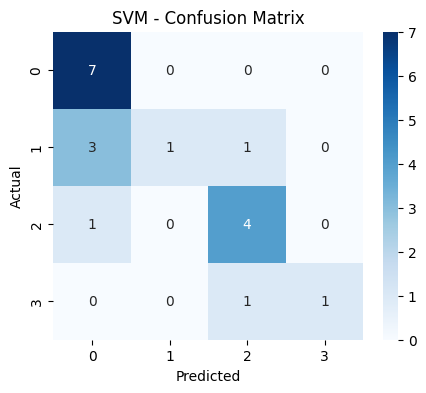


XGBoost Performance:
Accuracy: 0.5263157894736842
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.71      0.59         7
           1       0.50      0.20      0.29         5
           2       0.50      0.60      0.55         5
           3       1.00      0.50      0.67         2

    accuracy                           0.53        19
   macro avg       0.62      0.50      0.52        19
weighted avg       0.55      0.53      0.51        19



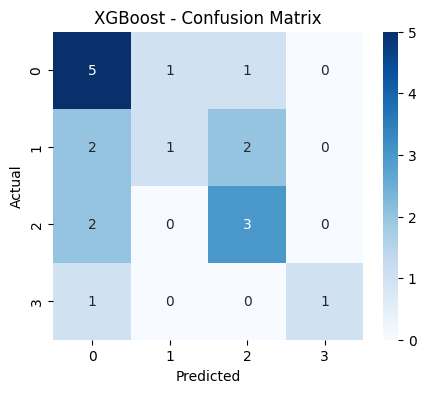

C:\Users\Administrator\AppData\Local\Temp\ipykernel_7816\992323025.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(results.keys()), y=list(results.values()), palette='viridis')


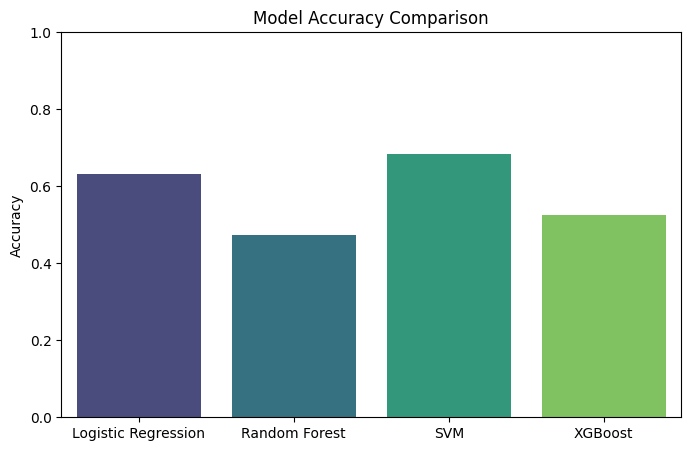

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
import seaborn as sns
import matplotlib.pyplot as plt

# ---------------------
# 1. Features & Target
# ---------------------
X = df.drop(columns=['Intensity_Level_encoded', 'Intensity_Level'])
y = df['Intensity_Level_encoded']

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ---------------------
# 2. Models
# ---------------------
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "SVM": SVC(kernel='rbf', probability=True, random_state=42),
    "XGBoost": XGBClassifier(eval_metric='mlogloss', random_state=42)
}

results = {}

# ---------------------
# 3. Training & Evaluation
# ---------------------
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    results[name] = acc

    print(f"\n{name} Performance:")
    print("Accuracy:", acc)
    print("Classification Report:\n", classification_report(y_test, preds))

    # Confusion Matrix
    cm = confusion_matrix(y_test, preds)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=np.unique(y),
                yticklabels=np.unique(y))
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# ---------------------
# 4. Compare Model Accuracy
# ---------------------
plt.figure(figsize=(8,5))
sns.barplot(x=list(results.keys()), y=list(results.values()), palette='viridis')
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.ylim(0, 1)
plt.show()
